In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as rng
from scipy.io import arff

In [18]:
spf_data = arff.loadarff('steel-plates-fault.arff')
spf_df = pd.DataFrame(spf_data[0])
spf_da = spf_df.to_numpy()
spf_x = spf_da[:, :-1]
spf_y = spf_da[:, -1]

io_data = arff.loadarff('ionosphere.arff')
io_df = pd.DataFrame(io_data[0])
io_da = io_df.to_numpy()
io_x = io_da[:, :-1]
io_y = io_da[:, -1]

ba_data = arff.loadarff('banknote-authentication.arff')
ba_df = pd.DataFrame(ba_data[0])
ba_da = ba_df.to_numpy()
ba_x = ba_da[:, :-1]
ba_y = ba_da[:, -1]


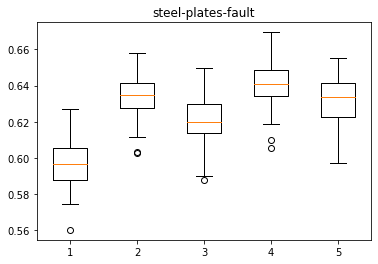

In [10]:
from matplotlib import pyplot as plt
from numpy import average
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

neighbor_value = [1,2,3,4,5]
knn_steelplate_accuracy_list=[]
for n in neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split( spf_x, spf_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)     
        pre_y = knn.predict(X_test)
        knn_steelplate_accuracy = accuracy_score(y_test, pre_y)
        knn_steelplate_accuracy_list.append(knn_steelplate_accuracy)
knn_steelplate_accuracy_final = pd.DataFrame( { '1': knn_steelplate_accuracy_list[0:50], 
                                            '2': knn_steelplate_accuracy_list[50:100], 
                                            '3': knn_steelplate_accuracy_list[100:150], 
                                            '4': knn_steelplate_accuracy_list[150:200], 
                                            '5': knn_steelplate_accuracy_list[200:250] } )

plt.title("steel-plates-fault") 
plt.boxplot(knn_steelplate_accuracy_final)
plt.show()
    

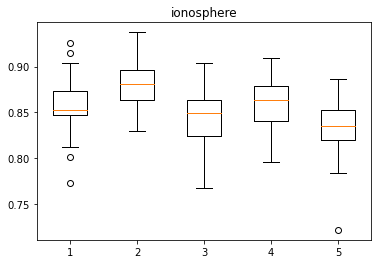

In [20]:
knn_ionosphere_accuracy_list=[]
for n in neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split( io_x, io_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)     
        pre_y = knn.predict(X_test)
        knn_ionosphere_accuracy = accuracy_score(y_test, pre_y)
        knn_ionosphere_accuracy_list.append(knn_ionosphere_accuracy)
knn_steelplate_accuracy_final = pd.DataFrame( { '1': knn_ionosphere_accuracy_list[0:50], 
                                            '2': knn_ionosphere_accuracy_list[50:100], 
                                            '3': knn_ionosphere_accuracy_list[100:150], 
                                            '4': knn_ionosphere_accuracy_list[150:200], 
                                            '5': knn_ionosphere_accuracy_list[200:250] } )

plt.title("ionosphere") 
plt.boxplot(knn_steelplate_accuracy_final)
plt.show()
                                            

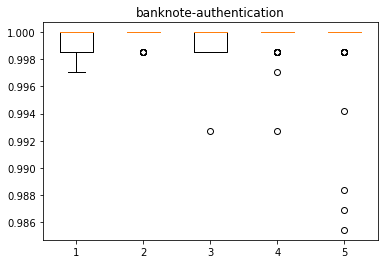

In [21]:
knn_banknote_list=[]
for n in neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split( ba_x, ba_y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)     
        pre_y = knn.predict(X_test)
        knn_banknote_accuracy = accuracy_score(y_test, pre_y)
        knn_banknote_list.append(knn_banknote_accuracy)
knn_banknote_accuracy_final = pd.DataFrame( { '1': knn_banknote_list[0:50], 
                                            '2': knn_banknote_list[50:100], 
                                            '3': knn_banknote_list[100:150], 
                                            '4': knn_banknote_list[150:200], 
                                            '5': knn_banknote_list[200:250] } )
plt.title("banknote-authentication") 
plt.boxplot(knn_banknote_accuracy_final)
plt.show()

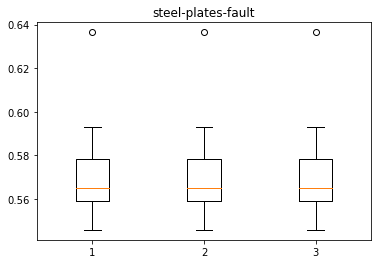

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb_steelplate_accuracy_list = []

gnb_neighbor_value = [1e-9,1e-5,1e-1]
for n in gnb_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=i)
        y_train=y_train.astype('str') # convert to string
        y_test = y_test.astype('str') # convert to string
        gnb = GaussianNB()
        y_pred = gnb.fit(X_train, y_train).predict(X_test)

        gnb_steelplate_accuracy = accuracy_score(y_test, pre_y)
        gnb_steelplate_accuracy_list.append(gnb_steelplate_accuracy)
        
# gnb_steelplate_accuracy_list
gnb_steelplate_accuracy_final = pd.DataFrame( { '1': gnb_steelplate_accuracy_list[0:50], 
                                            '2': gnb_steelplate_accuracy_list[50:100], 
                                            '3': gnb_steelplate_accuracy_list[100:150], } )

plt.title("steel-plates-fault") 
plt.boxplot(gnb_steelplate_accuracy_final)
plt.show()


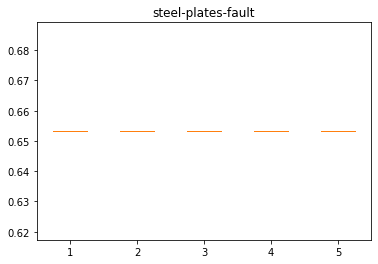

In [23]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_steelplate_accuracy_list = []
lr_neighbor_value = [0.1,0.5,1.0,2.0,5.0]

for n in lr_neighbor_value:
    for i in range(50):
        
        y=y.astype('str') # convert to string
       
        clf = LogisticRegression(random_state=i).fit(x, y)
        y_pred = clf.predict(x)
        lr_steelplate_accuracy = accuracy_score(y, y_pred)
        lr_steelplate_accuracy_list.append(lr_steelplate_accuracy)


lr_steelplate_accuracy_final = pd.DataFrame( { '1': lr_steelplate_accuracy_list[0:50], 
                                            '2': lr_steelplate_accuracy_list[50:100], 
                                            '3': lr_steelplate_accuracy_list[100:150], 
                                            '4': lr_steelplate_accuracy_list[150:200], 
                                            '5': lr_steelplate_accuracy_list[200:250] } )

plt.title("steel-plates-fault") 
plt.boxplot(lr_steelplate_accuracy_final)
plt.show()
     



In [41]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

dtc_steelplate_accuracy_list = []
dtc_neighbor_value = [1,3,5,8,10]

for n in dtc_neighbor_value:
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=i)
        
        clf = DecisionTreeClassifier(max_leaf_nodes=n, random_state=i)
        # clf.fit(X_train, y_train)

